In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm



In [17]:
DATADIR = "C:\\Users\Lenovo\OneDrive\Desktop\\NEW_image\\Dataset"
CATEGORIES =["Box", "Car","Cat","Circle","Cup", "Dish", "Food", "Food can","Hanger","Jelly","Medicine",
 "Metal can","Plastic", "Ship","Stapler", "Telephone","Toy", "Vase", "Vegetable","Wood"]


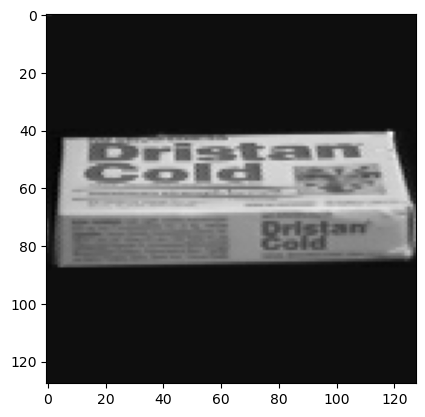

[[49 46 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]
 ...
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]]
(128, 128)


In [18]:
for category in CATEGORIES:  
    
    path = os.path.join(DATADIR,category)   
    for img in os.listdir(path):   
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show() 

        break   
    break
    
print(img_array)
print(img_array.shape)


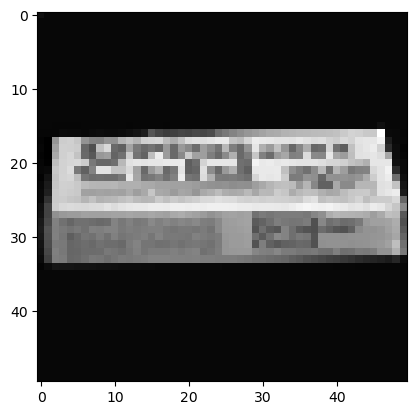

In [19]:

IMG_SIZE =50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()



In [20]:

training_data = []

def create_training_data():
    for category in CATEGORIES:   

        path = os.path.join(DATADIR,category)   
        class_num = CATEGORIES.index(category)   
        

        for img in tqdm(os.listdir(path)):   
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:   
                pass
            
create_training_data()
lenofimage = len(training_data)
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(lenofimage,-1) 
print(X.shape)
X = X/255.0

y=np.array(y)

print(y.shape)



100%|██████████| 316/316 [00:00<00:00, 954.42it/s] 

(5339, 2500)
(5339,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)


In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3577, 2500)
(3577,)
(1762, 2500)
(1762,)


In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
clf=svc.fit(X_train, y_train)



In [33]:

print('SVCModel Train Score is : ' , svc.score(X_train, y_train))
print('SVCModel Test Score is : ' , svc.score(X_test, y_test))
print('SVCModel Classes are : ' , svc.classes_)


SVCModel Train Score is :  1.0
SVCModel Test Score is :  0.9824063564131669
SVCModel Classes are :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [34]:
y2 = svc.predict(X_test)
print('Predicted Value for SVCModel is : ' ,CATEGORIES[y2[0]])
print('----------------------------------------------------')

Predicted Value for SVCModel is :  Wood
----------------------------------------------------


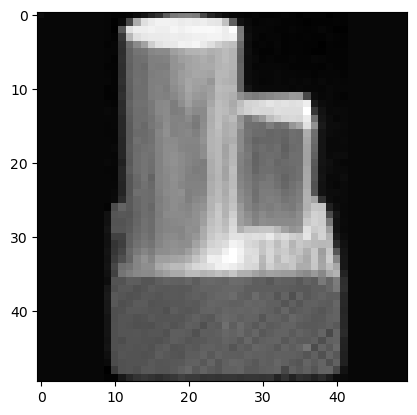

In [35]:
img_array=X_test[0].reshape(IMG_SIZE, IMG_SIZE)
plt.imshow(img_array, cmap='gray') 
plt.show() 


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y2 )
print('Confusion Matrix is : \n', cm)
print('----------------------------------------------------')
print('----------------------------------------------------')


Confusion Matrix is : 
 [[177   2   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1 166   0   0   1   0   0   0   0   0   0   0   1   2   0   0   2   0
    0   0]
 [  0   0  47   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0 187   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0  25   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0  40   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0  68   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0  33   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0  32   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 265   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0

<AxesSubplot:>

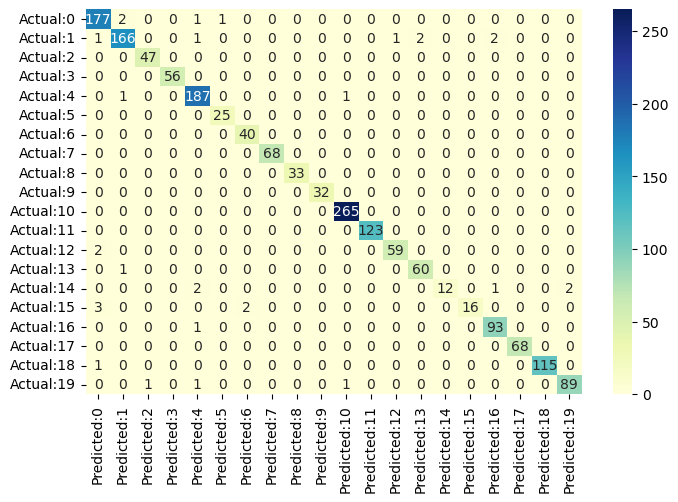

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,y2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4',
                                          'Predicted:5','Predicted:6','Predicted:7','Predicted:8','Predicted:9',
                                          'Predicted:10','Predicted:11','Predicted:12','Predicted:13','Predicted:14',
                                          'Predicted:15','Predicted:16','Predicted:17','Predicted:18','Predicted:19']
                         ,index=['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6',
                                 'Actual:7','Actual:8','Actual:9','Actual:10','Actual:11','Actual:12','Actual:13'
                                ,'Actual:14','Actual:15','Actual:16','Actual:17','Actual:18','Actual:19'])
 
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [28]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(y_test, y2 )
print('Accuracy Score is : ', AccScore)
print('----------------------------------------------------')


Accuracy Score is :  0.9824063564131669
----------------------------------------------------


In [29]:
import numpy as np
import pandas as pd
from sklearn import model_selection, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

 
def SvmLossCurve(X,y):
    X_tr,X_val,y_tr,y_val=model_selection.train_test_split(X_train,y_train,test_size=0.33)
    mlp=MLPClassifier(activation="relu",max_iter=3000)
    mlp.fit(X_train,y_train)
    print (mlp.score(X_train,y_train))
    plt.plot(mlp.loss_curve_)
    mlp.fit(X_val,y_val)
    plt.plot(mlp.loss_curve_)
 

1.0


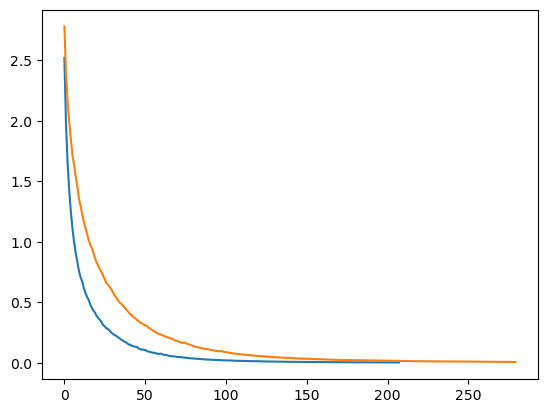

In [30]:
 SvmLossCurve(X_train,y_train)

ROC AUC score: 0.9818604972755225


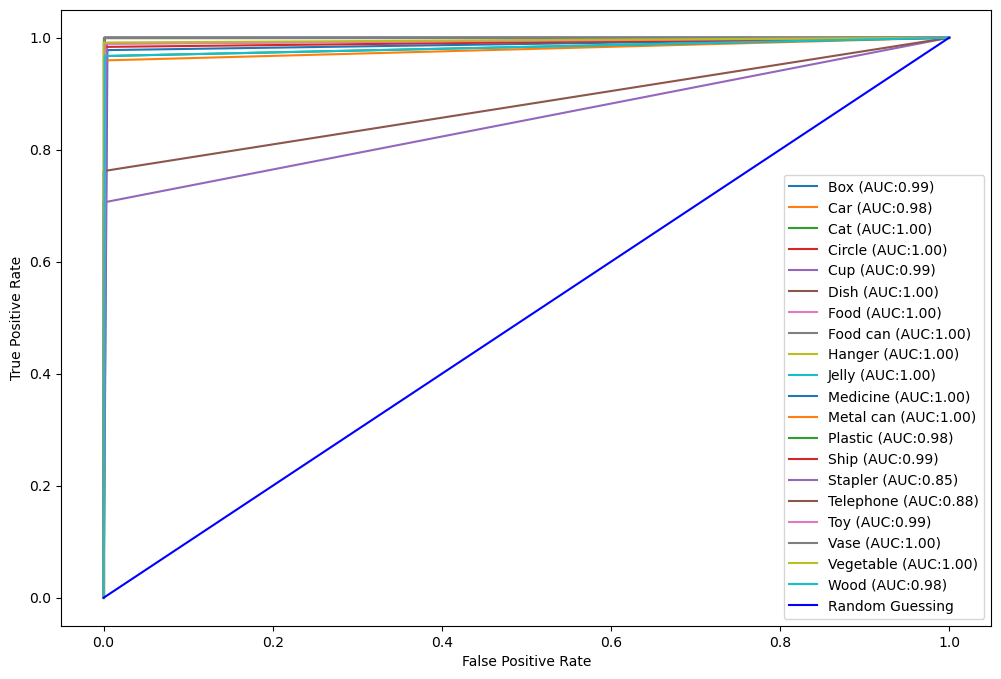

In [31]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


CATEGORIES = [ "Box", "Car", "Cat", "Circle", "Cup", "Dish", "Food", "Food can",
               "Hanger", "Jelly", "Medicine", "Metal can","Plastic", "Ship", 
               "Stapler", "Telephone","Toy", "Vase", "Vegetable","Wood" ]


# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y2, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y2 = lb.transform(y2)

    for (idx, c_label) in enumerate(CATEGORIES):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y2[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y2, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y2))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

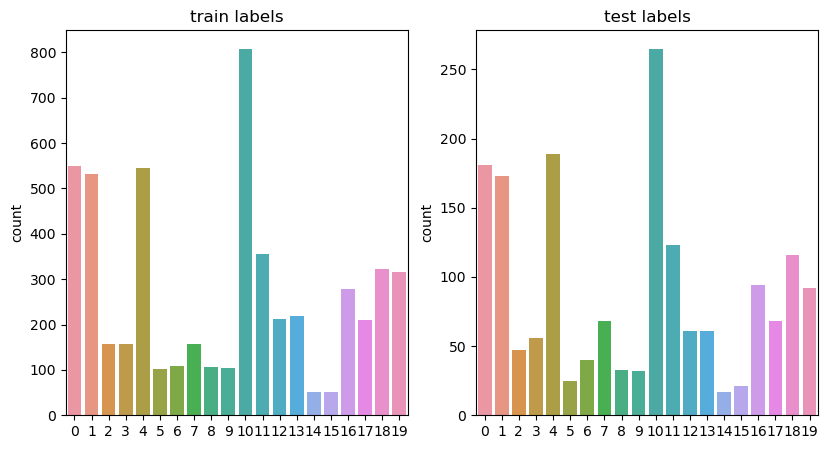

In [32]:
import seaborn as sns
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([y , y_test] , ['train labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()